<a href="https://colab.research.google.com/github/mateusribeirocampos/diollm/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install tensorflow

In [16]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

In [17]:
tf.__version__

'2.18.0'

In [18]:
%load_ext tensorboard

In [19]:
logdir='log'

In [21]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes={0,1,2,3,4,5,6,7,8,9}

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 30ms/step - accuracy: 0.8935 - loss: 0.3402 - val_accuracy: 0.9834 - val_loss: 0.0496
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 101s 40ms/step - accuracy: 0.9852 - loss: 0.0482 - val_accuracy: 0.9873 - val_loss: 0.0362
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.9900 - loss: 0.0303 - val_accuracy: 0.9844 - val_loss: 0.0509
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 31ms/step - accuracy: 0.9926 - loss: 0.0220 - val_accuracy: 0.9902 - val_loss: 0.0337
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9938 - loss: 0.0186 - val_accuracy: 0.9898 - val_loss: 0.0337


In [26]:
y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [27]:
classes={0,1,2,3,4,5,6,7,8,9}

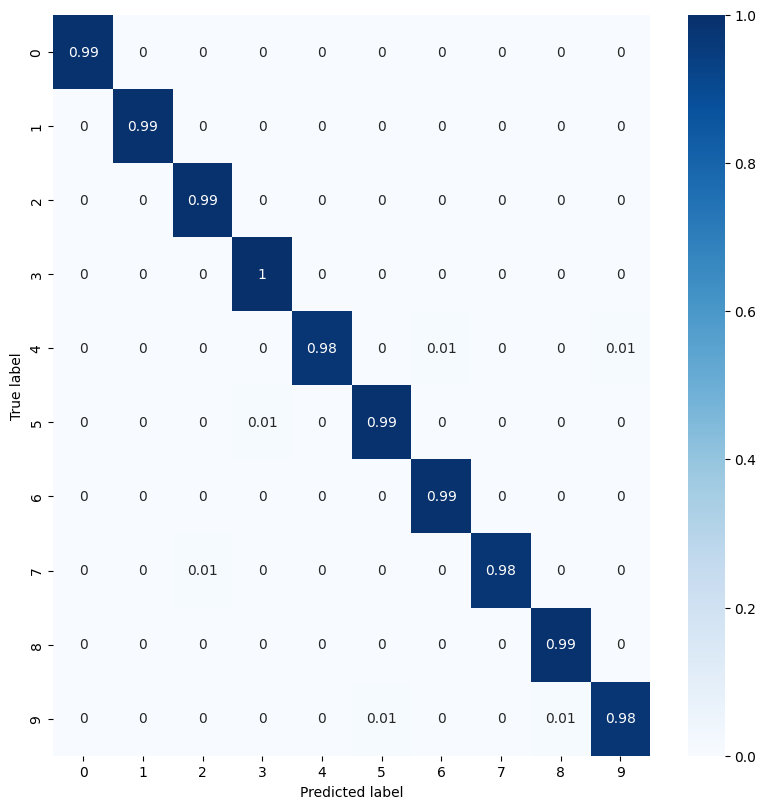

In [29]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

classes_list = list(classes)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes_list,
                     columns = classes_list)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Calculo das métricas de avaliação de aprendizado

## Sensibilidade



In [36]:
print("Valores reais")
print(con_mat)

Valores reais
[[ 974    0    0    0    0    0    2    1    0    3]
 [   0 1129    2    3    0    0    0    0    0    1]
 [   0    1 1026    0    0    0    2    3    0    0]
 [   0    0    1 1007    0    1    0    0    1    0]
 [   0    2    1    0  963    0    5    0    2    9]
 [   1    0    0    5    0  882    2    0    1    1]
 [   1    2    0    0    1    1  952    0    1    0]
 [   0    3   10    1    0    0    0 1009    1    4]
 [   2    0    2    0    0    0    2    3  964    1]
 [   0    1    0    0    1    6    0    1    8  992]]


## Exemplo de uma classe calculada

No caso do calculo da sensibilidade vamos observar os dados nas linhas de cada classe. A classe selecionada foi a 0 com número total de 1000 (974 + 2 + 1 + 3) amostras. Desse total de 1000 amostras, 974 são verdadeiras positivas e 6 são falsas positivas. Como o calculo da sensibilidade é:

```
Sensibilidade = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Negativos)
```

Então,

```
Sensibilidade = 974 / (974 + 6)
Sensibilidade = 0.974
```


In [38]:
sensibility = np.diag(con_mat) / np.sum(con_mat, axis = 1)
print("Sensibilidade")
print(classes)
print(sensibility)

Sensibilidade
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
[0.99387755 0.99471366 0.99418605 0.9970297  0.98065173 0.98878924
 0.99373695 0.98151751 0.98973306 0.98315164]
